In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exist.... skip download")
else:
  print(f"{image_path} no directory found.... creating...")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_sushi_steak.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading file from link")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping file")
  zip_ref.extractall(image_path)
  print("Unzip done")


data/pizza_steak_sushi directory already exist.... skip download
Unzipping file
Unzip done


In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/pizza/648055.jpg
Image class: pizza
Image height: 512
Image width: 512


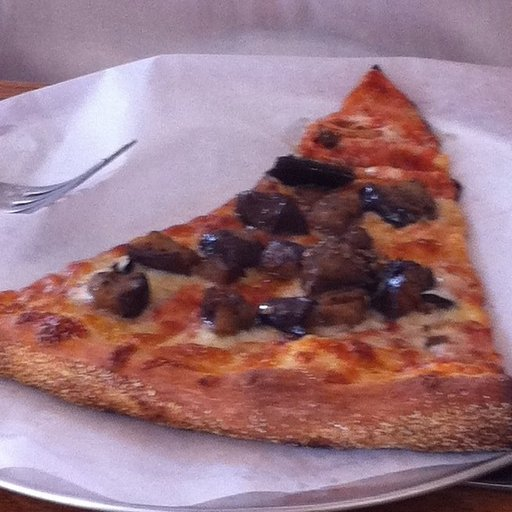

In [ ]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

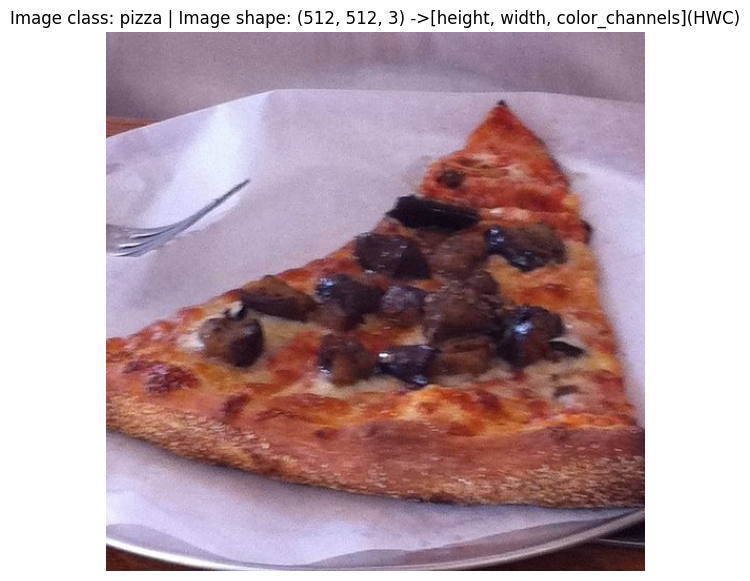

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} ->[height, width, color_channels](HWC)")
plt.axis(False)

array([[[143, 124, 146],
        [141, 122, 144],
        [149, 130, 152],
        ...,
        [143, 118, 139],
        [144, 119, 138],
        [144, 119, 138]],

       [[147, 128, 150],
        [145, 126, 148],
        [147, 128, 150],
        ...,
        [144, 119, 140],
        [145, 120, 139],
        [146, 121, 140]],

       [[139, 120, 142],
        [142, 123, 145],
        [147, 128, 150],
        ...,
        [148, 123, 144],
        [152, 127, 146],
        [157, 132, 151]],

       ...,

       [[ 85,  36,  29],
        [ 82,  33,  26],
        [ 82,  33,  26],
        ...,
        [ 84,  35,  28],
        [ 84,  35,  28],
        [ 84,  35,  28]],

       [[ 89,  39,  32],
        [ 86,  36,  29],
        [ 85,  35,  28],
        ...,
        [ 79,  29,  20],
        [ 80,  30,  21],
        [ 80,  30,  21]],

       [[ 86,  36,  29],
        [ 86,  36,  29],
        [ 85,  35,  28],
        ...,
        [ 88,  38,  29],
        [ 92,  42,  33],
        [ 94,  44,  35]]], dtype=uint8)
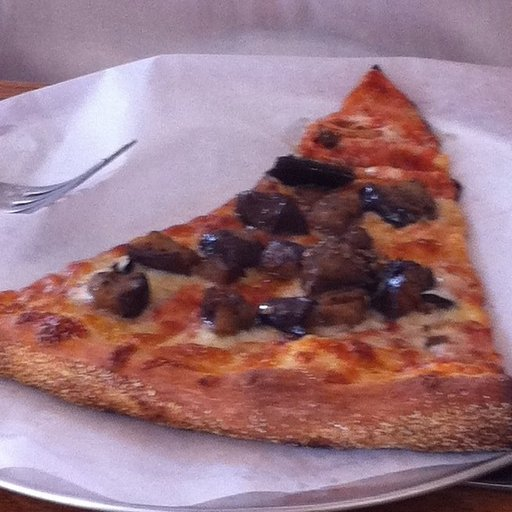

In [ ]:
img_as_array

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

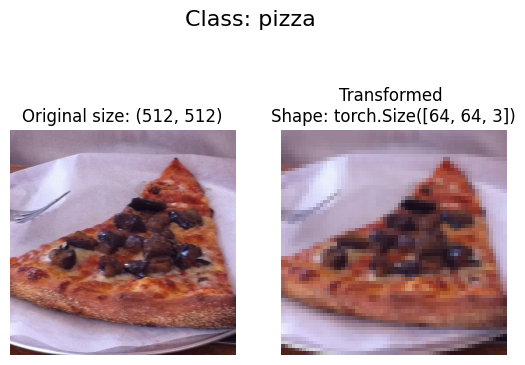

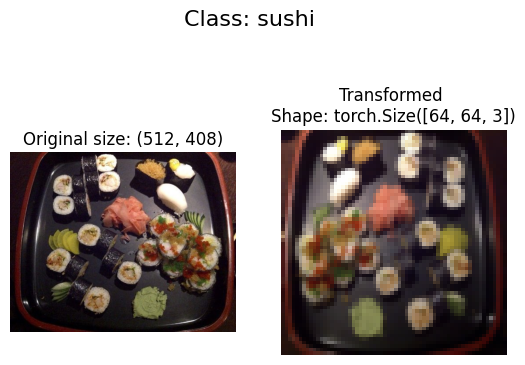

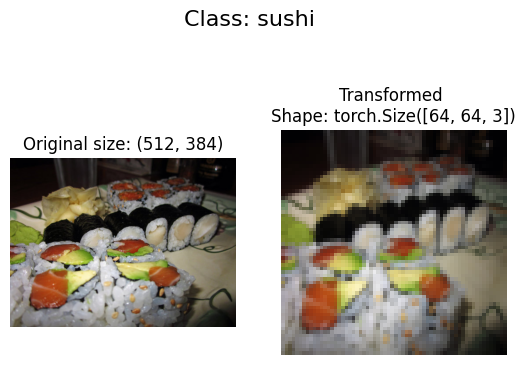

In [ ]:
def plot_transformed_image(image_paths:list, transform, n=3, seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original size: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_image(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=42)

In [ ]:
from torchvision import datasets

train_data =datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

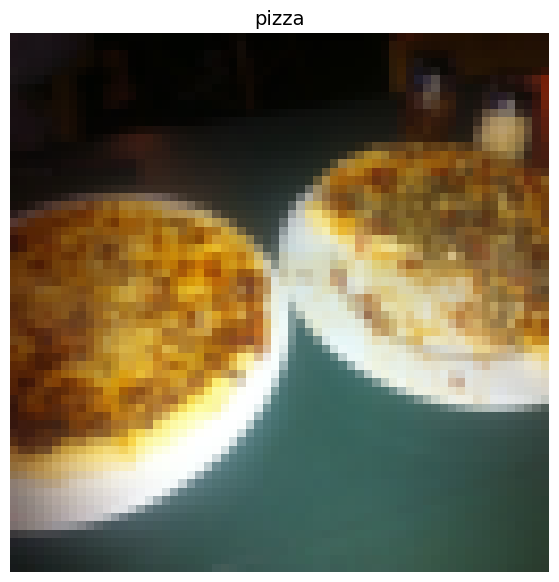

In [ ]:
img_permute = img.permute(1,2,0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                          num_workers=1,
                          shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                         batch_size=BATCH_SIZE,
                         num_workers=1,
                         shuffle=False)

len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
target_directory = train_dir
print(f"Target dir: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'steak'>, <DirEntry 'pizza'>]

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"No classes found in {directory}... please verify directory")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir:str,
               transform=None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

    self.transform = transform

    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index:int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.ToTensor()])



In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x783193a0bb50>,
 <__main__.ImageFolderCustom at 0x78318edfedd0>)

In [ ]:
test_data_custom.classes, train_data_custom.class_to_idx
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


In [ ]:
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purpose only. Variable n shouldn't be larger than 10, setting to 10 and removing shape display")

  if seed:
    random.seed(seed)
  random_samples_idk = random.sample(range(len(dataset)),k=n)

  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_samples_idk):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape:{targ_image_adjust.shape}"
    plt.title(title)

For display purpose only. Variable n shouldn't be larger than 10, setting to 10 and removing shape display


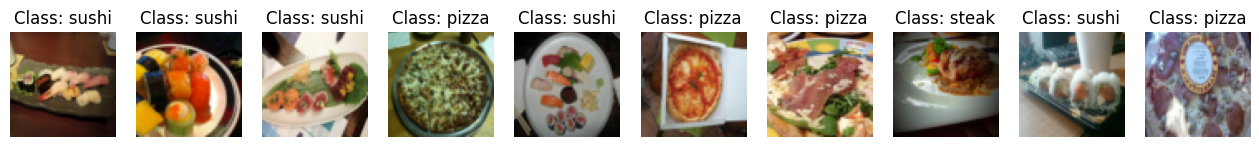

In [ ]:
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=None)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x783193a41f10>,
 <torch.utils.data.dataloader.DataLoader at 0x783193a05410>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor()])

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1987407.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3806282.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1434806.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/988559.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/499605.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3837522.jpg')]

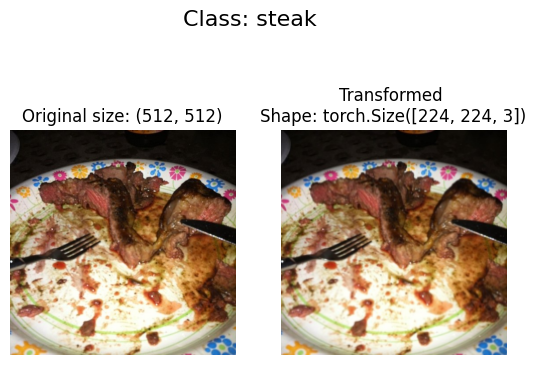

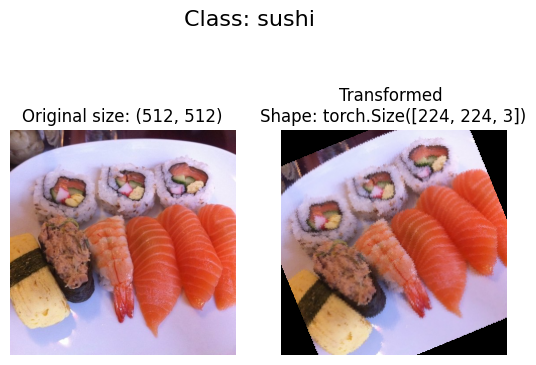

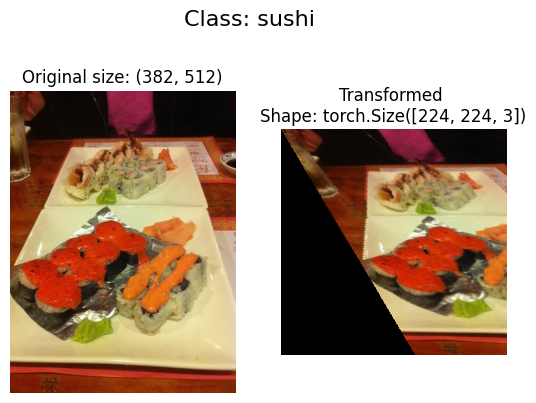

In [ ]:
plot_transformed_image(image_paths=image_path_list,
                       transform=train_transform,
                       n=3,
                       seed=None)

In [ ]:
simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifer(x)
    # print(x.shape)
    return x

In [ ]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=50,
                  output_shape=len(class_names)).to(device)

model_0



TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12800, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

tensor([[ 0.0250,  0.0147,  0.0126],
        [ 0.0237,  0.0159,  0.0395],
        [ 0.0162,  0.0056,  0.0201],
        [ 0.0194,  0.0023,  0.0339],
        [ 0.0272,  0.0030,  0.0112],
        [ 0.0375,  0.0137,  0.0370],
        [ 0.0203,  0.0129,  0.0268],
        [ 0.0201,  0.0002,  0.0309],
        [ 0.0236,  0.0147,  0.0386],
        [ 0.0186, -0.0158,  0.0212],
        [ 0.0199,  0.0240,  0.0261],
        [ 0.0170,  0.0067,  0.0287],
        [ 0.0284,  0.0191,  0.0505],
        [ 0.0284,  0.0094,  0.0390],
        [ 0.0363,  0.0229,  0.0211],
        [ 0.0488,  0.0170,  0.0092],
        [ 0.0330,  0.0050,  0.0336],
        [ 0.0322, -0.0003,  0.0332],
        [ 0.0301,  0.0142,  0.0377],
        [ 0.0294,  0.0093,  0.0307],
        [ 0.0218, -0.0009,  0.0121],
        [ 0.0375,  0.0145,  0.0318],
        [ 0.0295,  0.0169,  0.0226],
        [ 0.0302,  0.0209,  0.0293],
        [ 0.0233,  0.0006,  0.0203],
        [ 0.0308, -0.0151,  0.0084],
        [ 0.0377,  0.0090,  0.0256],
 

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-8                    [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 3]                    --
│    └─Flatten: 2-9                      [1, 2560]                 --
│    └─Linea

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)

    return train_loss, train_acc



In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()

      test_pred_labels =  test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  test_loss = test_loss/ len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):

  results = {"train_loss":[],
            "train_acc":[],
            "test_loss":[],
            "test_acc":[]}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train_acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 100

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time: .3f} seconds")


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.1368 | Train_acc: 0.0430 | Test loss: 1.1397 | Test acc: 0.2604
Epoch: 1 | Train loss: 0.1424 | Train_acc: 0.0273 | Test loss: 1.1168 | Test acc: 0.2604
Epoch: 2 | Train loss: 0.1374 | Train_acc: 0.0430 | Test loss: 1.0941 | Test acc: 0.2604
Epoch: 3 | Train loss: 0.1355 | Train_acc: 0.0508 | Test loss: 1.0787 | Test acc: 0.2604
Epoch: 4 | Train loss: 0.1369 | Train_acc: 0.0508 | Test loss: 1.0715 | Test acc: 0.2604
Epoch: 5 | Train loss: 0.1391 | Train_acc: 0.0352 | Test loss: 1.0658 | Test acc: 0.2898
Epoch: 6 | Train loss: 0.1393 | Train_acc: 0.0352 | Test loss: 1.0604 | Test acc: 0.5417
Epoch: 7 | Train loss: 0.1353 | Train_acc: 0.0430 | Test loss: 1.0572 | Test acc: 0.5417
Epoch: 8 | Train loss: 0.1401 | Train_acc: 0.0195 | Test loss: 1.0607 | Test acc: 0.5417
Epoch: 9 | Train loss: 0.1379 | Train_acc: 0.0352 | Test loss: 1.0663 | Test acc: 0.5417
Epoch: 10 | Train loss: 0.1391 | Train_acc: 0.0547 | Test loss: 1.0698 | Test acc: 0.5417
Epoch: 11 | Train lo

In [ ]:
model_0_results

{'train_loss': [0.13682880997657776,
  0.14243175089359283,
  0.13738249242305756,
  0.13548165559768677,
  0.1368914395570755,
  0.139084592461586,
  0.13926751911640167,
  0.1352972835302353,
  0.1401391625404358,
  0.13794688880443573,
  0.13911840319633484,
  0.13643772900104523,
  0.14266908168792725,
  0.1383078694343567,
  0.13874703645706177,
  0.1374925822019577,
  0.13700667023658752,
  0.1372985541820526,
  0.13662590086460114,
  0.13789324462413788,
  0.13734427094459534,
  0.13758614659309387,
  0.13793858885765076,
  0.1362980306148529,
  0.13585510849952698,
  0.1372537761926651,
  0.13445699214935303,
  0.13353519141674042,
  0.13673625886440277,
  0.13597625494003296,
  0.13905233144760132,
  0.1344182938337326,
  0.13288480043411255,
  0.13141822814941406,
  0.13453902304172516,
  0.13407228887081146,
  0.13660477101802826,
  0.1327158808708191,
  0.13245920836925507,
  0.13207928836345673,
  0.13220742344856262,
  0.1292463093996048,
  0.13201791048049927,
  0.134131

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):

  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();



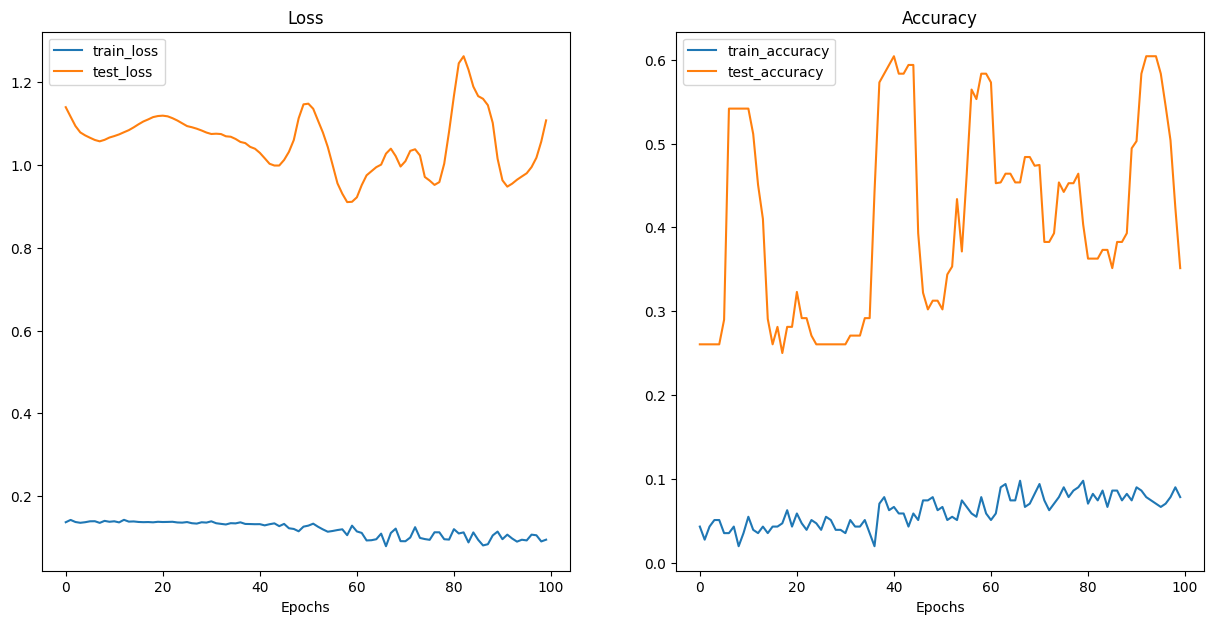

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                          transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=test_transform_trivial)

In [ ]:
import os

from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS
                                        )
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [ ]:
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=50,
                  output_shape=len(train_data_augmented.classes)).to(device)

In [ ]:
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12800, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 100

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_timer = timer()

print(f"Total model training time: {end_time-start_time:.3f} seconds")




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.1373 | Train_acc: 0.0391 | Test loss: 1.0006 | Test acc: 0.5417
Epoch: 1 | Train loss: 0.1433 | Train_acc: 0.0508 | Test loss: 1.0109 | Test acc: 0.5417
Epoch: 2 | Train loss: 0.1396 | Train_acc: 0.0391 | Test loss: 1.0516 | Test acc: 0.5417
Epoch: 3 | Train loss: 0.1431 | Train_acc: 0.0312 | Test loss: 1.0822 | Test acc: 0.2604
Epoch: 4 | Train loss: 0.1361 | Train_acc: 0.0469 | Test loss: 1.0973 | Test acc: 0.2604
Epoch: 5 | Train loss: 0.1395 | Train_acc: 0.0391 | Test loss: 1.1087 | Test acc: 0.2604
Epoch: 6 | Train loss: 0.1380 | Train_acc: 0.0391 | Test loss: 1.1150 | Test acc: 0.2604
Epoch: 7 | Train loss: 0.1377 | Train_acc: 0.0391 | Test loss: 1.1172 | Test acc: 0.2604
Epoch: 8 | Train loss: 0.1361 | Train_acc: 0.0469 | Test loss: 1.1270 | Test acc: 0.2812
Epoch: 9 | Train loss: 0.1372 | Train_acc: 0.0586 | Test loss: 1.1324 | Test acc: 0.2708
Epoch: 10 | Train loss: 0.1359 | Train_acc: 0.0664 | Test loss: 1.1413 | Test acc: 0.2604
Epoch: 11 | Train lo

In [ ]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_1_df

train_loss  train_acc  test_loss  test_acc
0     0.137322   0.039062   1.000648  0.541667
1     0.143324   0.050781   1.010884  0.541667
2     0.139633   0.039062   1.051620  0.541667
3     0.143096   0.031250   1.082187  0.260417
4     0.136123   0.046875   1.097260  0.260417
..         ...        ...        ...       ...
95    0.107412   0.058594   0.981059  0.493371
96    0.113053   0.074219   0.966252  0.503788
97    0.138629   0.050781   0.980195  0.515152
98    0.113503   0.062500   1.031309  0.464015
99    0.099683   0.074219   1.093151  0.454545

[100 rows x 4 columns]

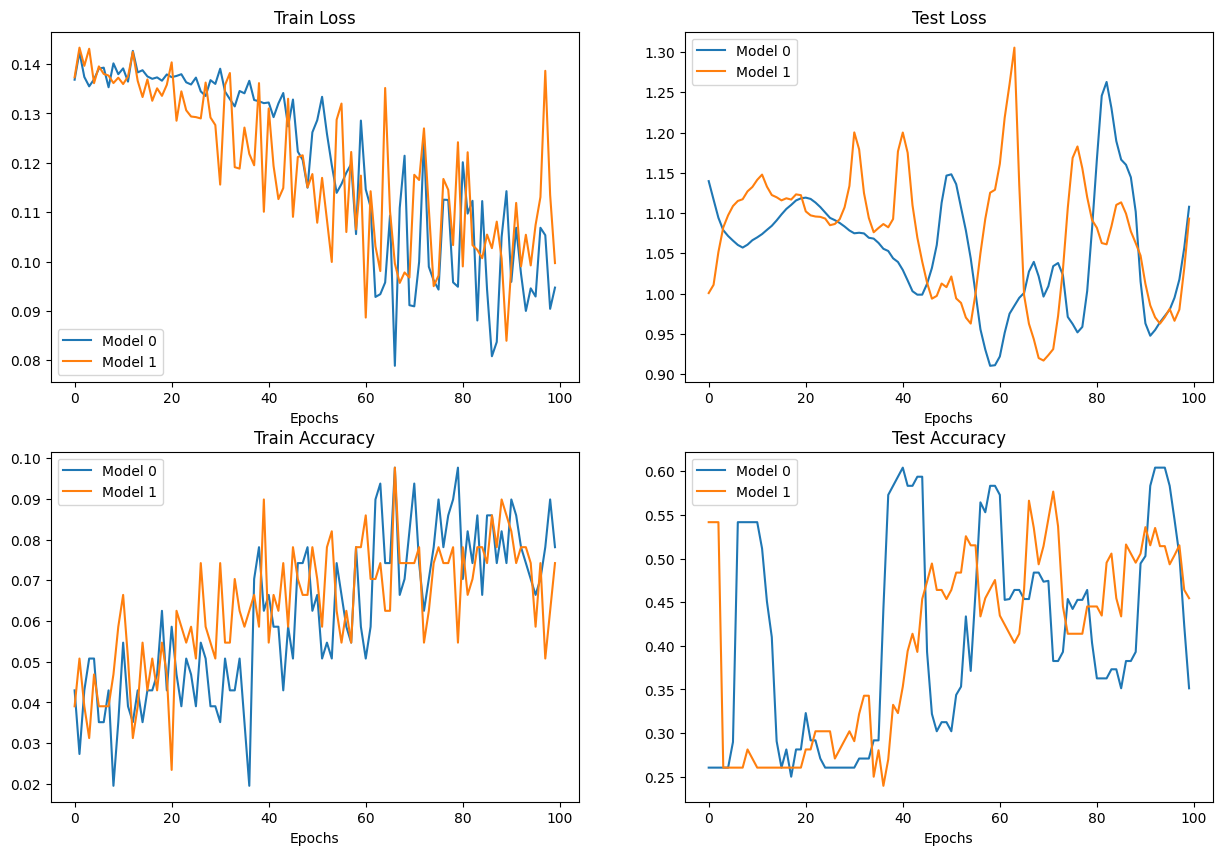

In [ ]:
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
import requests

custom_image_path = data_path/"Vegetarian-Sushi-Rolls-9707-I-1.jpg"

# if not custom_image_path.is_file():
#   with open(custom_image_path, "wb") as f:
#     request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
#     print(f"Downloading {custom_image_path}....")
#     f.write(request.content)
# else:
#   print(f"{custom_image_path} already exist.")



In [ ]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape:\n {custom_image_uint8.shape}")
print(f"Custom image datatype:\n {custom_image_uint8.dtype}")
custom_image_uint8

Custom image tensor:
 tensor([[[  9,  10,   8,  ..., 149, 149, 150],
         [ 10,  10,   8,  ..., 149, 149, 150],
         [ 10,  10,   8,  ..., 150, 149, 149],
         ...,
         [  1,   1,   1,  ...,  68,  54,  63],
         [  1,   1,   1,  ...,  73,  53,  42],
         [  1,   1,   1,  ...,  58,  69,  58]],

        [[  6,   7,   7,  ..., 123, 123, 124],
         [  7,   7,   7,  ..., 123, 123, 124],
         [  7,   7,   7,  ..., 124, 123, 123],
         ...,
         [  1,   1,   1,  ...,  50,  36,  45],
         [  1,   1,   1,  ...,  55,  35,  24],
         [  1,   1,   1,  ...,  40,  51,  40]],

        [[ 35,  36,  38,  ...,  86,  88,  89],
         [ 36,  36,  38,  ...,  86,  88,  89],
         [ 36,  36,  38,  ...,  87,  88,  88],
         ...,
         [  1,   1,   1,  ...,  36,  22,  31],
         [  1,   1,   1,  ...,  41,  21,  10],
         [  1,   1,   1,  ...,  26,  37,  26]]], dtype=torch.uint8)
Custom image shape:
 torch.Size([3, 800, 1200])
Custom image data

tensor([[[  9,  10,   8,  ..., 149, 149, 150],
         [ 10,  10,   8,  ..., 149, 149, 150],
         [ 10,  10,   8,  ..., 150, 149, 149],
         ...,
         [  1,   1,   1,  ...,  68,  54,  63],
         [  1,   1,   1,  ...,  73,  53,  42],
         [  1,   1,   1,  ...,  58,  69,  58]],

        [[  6,   7,   7,  ..., 123, 123, 124],
         [  7,   7,   7,  ..., 123, 123, 124],
         [  7,   7,   7,  ..., 124, 123, 123],
         ...,
         [  1,   1,   1,  ...,  50,  36,  45],
         [  1,   1,   1,  ...,  55,  35,  24],
         [  1,   1,   1,  ...,  40,  51,  40]],

        [[ 35,  36,  38,  ...,  86,  88,  89],
         [ 36,  36,  38,  ...,  86,  88,  89],
         [ 36,  36,  38,  ...,  87,  88,  88],
         ...,
         [  1,   1,   1,  ...,  36,  22,  31],
         [  1,   1,   1,  ...,  41,  21,  10],
         [  1,   1,   1,  ...,  26,  37,  26]]], dtype=torch.uint8)

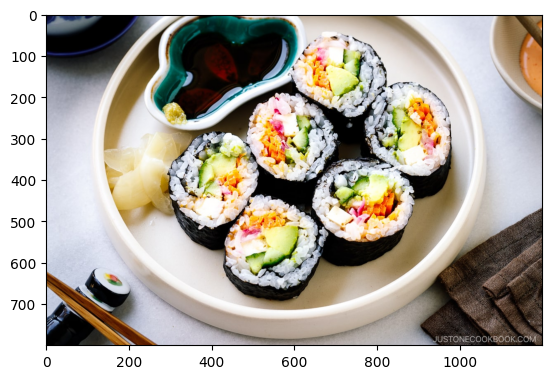

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image = custom_image/255.

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: \n{custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")


Custom image tensor:
tensor([[[0.0353, 0.0392, 0.0314,  ..., 0.5843, 0.5843, 0.5882],
         [0.0392, 0.0392, 0.0314,  ..., 0.5843, 0.5843, 0.5882],
         [0.0392, 0.0392, 0.0314,  ..., 0.5882, 0.5843, 0.5843],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.2667, 0.2118, 0.2471],
         [0.0039, 0.0039, 0.0039,  ..., 0.2863, 0.2078, 0.1647],
         [0.0039, 0.0039, 0.0039,  ..., 0.2275, 0.2706, 0.2275]],

        [[0.0235, 0.0275, 0.0275,  ..., 0.4824, 0.4824, 0.4863],
         [0.0275, 0.0275, 0.0275,  ..., 0.4824, 0.4824, 0.4863],
         [0.0275, 0.0275, 0.0275,  ..., 0.4863, 0.4824, 0.4824],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.1961, 0.1412, 0.1765],
         [0.0039, 0.0039, 0.0039,  ..., 0.2157, 0.1373, 0.0941],
         [0.0039, 0.0039, 0.0039,  ..., 0.1569, 0.2000, 0.1569]],

        [[0.1373, 0.1412, 0.1490,  ..., 0.3373, 0.3451, 0.3490],
         [0.1412, 0.1412, 0.1490,  ..., 0.3373, 0.3451, 0.3490],
         [0.1412, 0.1412, 0.1490,  ..

(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

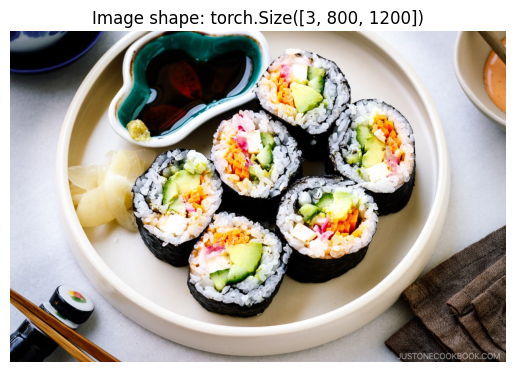

In [ ]:
plt.imshow(custom_image.permute(1,2,0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)

In [ ]:
from torchvision import transforms
custom_image_transform = transforms.Compose([transforms.Resize(size=(64, 64))])

custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"Original shape: {custom_image_transformed.shape}")


Original shape: torch.Size([3, 800, 1200])
Original shape: torch.Size([3, 64, 64])


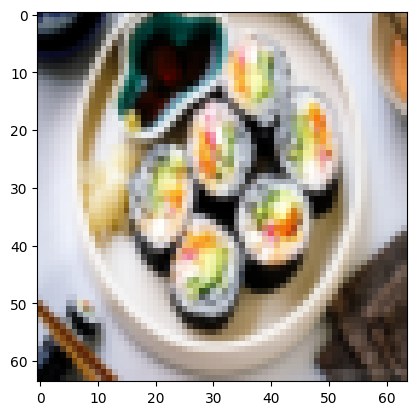

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [ ]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred


tensor([[ 0.1980, -0.5588,  0.2568]])

In [ ]:
#logits -> probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1).cpu()
custom_image_pred_probs


tensor([[0.3953, 0.1855, 0.4192]])

In [ ]:
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim = 1)
custom_image_pred_labels

tensor([2])

In [ ]:
class_names[custom_image_pred_labels]

'sushi'

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_name: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

In [ ]:
def pred_and_plot(model: torch.nn.Module,
                  image_path: str,
                  class_name: List[str] = None,
                  transform=None,
                  device:torch.device = device):
  target_image= torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image = target_image/255.

  # if transform !=[]:
  target_image=transform(target_image)

  model.to(device)

  model.eval()

  with torch.inference_mode():
    target_image = target_image.unsqueeze(dim=0)

    target_image_pred = model(target_image.to(device))

  print(target_image_pred.shape)

  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  target_image_pred_label = torch.argmax(target_image_pred_probs, dim = 1)

  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)


torch.Size([1, 3])


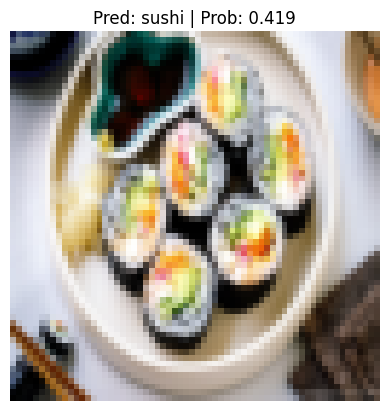

In [ ]:
pred_and_plot(model=model_1,
              image_path=custom_image_path,
              class_name=class_names,
              transform=custom_image_transform,
              device=device)
